## Plotting UNVR stock market data

#### Import Dependencies

In [1]:
import yfinance as yf
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)

#### get stock market data

In [2]:
end = dt.datetime.now()
start = dt.datetime(2017,1,1)
start, end

(datetime.datetime(2017, 1, 1, 0, 0),
 datetime.datetime(2026, 2, 15, 21, 53, 12, 194516))

In [3]:
df = yf.download('UNVR.JK', start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price             Close         High          Low         Open    Volume
Ticker          UNVR.JK      UNVR.JK      UNVR.JK      UNVR.JK   UNVR.JK
Date                                                                    
2017-01-02  5740.632812  5740.632812  5740.632812  5740.632812         0
2017-01-03  5744.332031  5799.814955  5740.633170  5770.224062   5014500
2017-01-04  5947.769043  5969.962211  5748.030530  5748.030530  10642000
2017-01-05  5999.553711  5999.553711  5921.877615  5992.155987  10493500
2017-01-06  6006.951172  6058.735234  5892.286464  5962.564833   5400500

#### Create Moving Average terms

In [4]:
df['MA50'] =df['Close']['UNVR.JK'].rolling(window=50, min_periods=1).mean()
df['MA200'] =df['Close']['UNVR.JK'].rolling(window=200, min_periods=1).mean()
df['MA200'].head()

Date
2017-01-02    5740.632812
2017-01-03    5742.482422
2017-01-04    5810.911296
2017-01-05    5858.071899
2017-01-06    5887.847754
Name: MA200, dtype: float64

#### Create plotly fig / subplot

In [5]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                   vertical_spacing=0.1, subplot_titles=('UNVR', 'Volume'),
                   row_width=[0.2, 0.7])

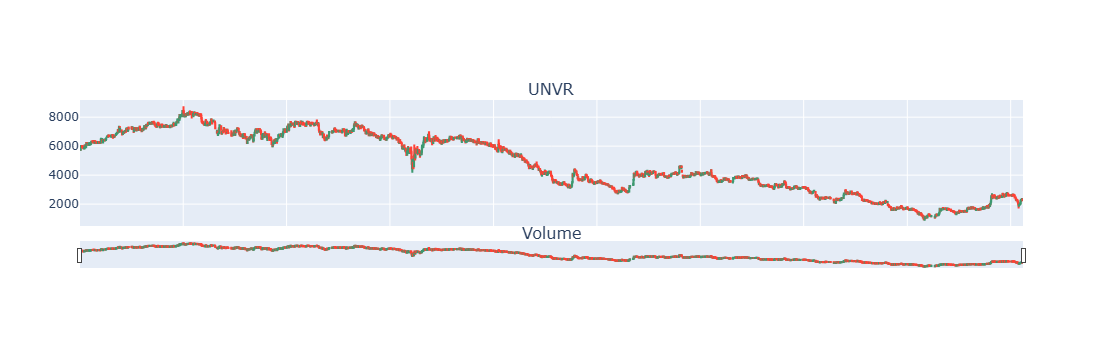

In [6]:
fig.add_trace(
    go.Candlestick(x=df.index, 
                   open=df['Open']['UNVR.JK'],
                   high=df['High']['UNVR.JK'],
                   low=df['Low']['UNVR.JK'],
                   close=df['Close']['UNVR.JK'],
                   name='OHLC'),
    row=1,
    col=1
)

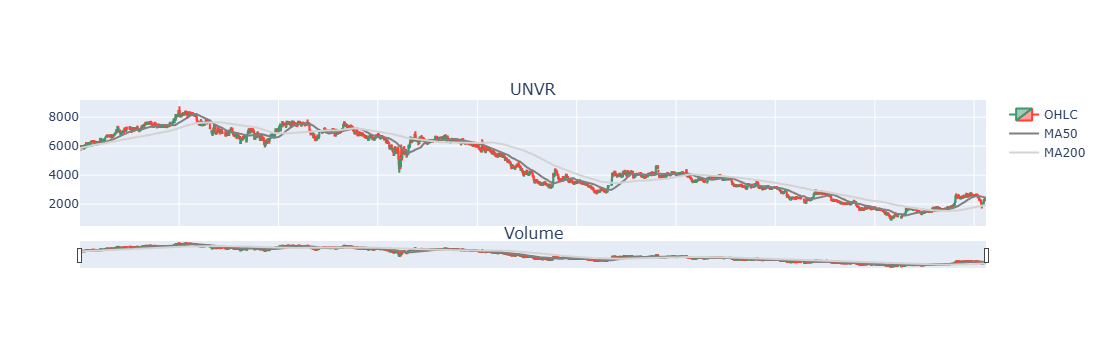

In [7]:
fig.add_trace(
    go.Scatter(x=df.index, y=df['MA50'], marker_color='grey', name='MA50'),
    row=1,
    col=1
)
fig.add_trace(
    go.Scatter(x=df.index, y=df['MA200'], marker_color='lightgrey', name='MA200'),
    row=1,
    col=1
)


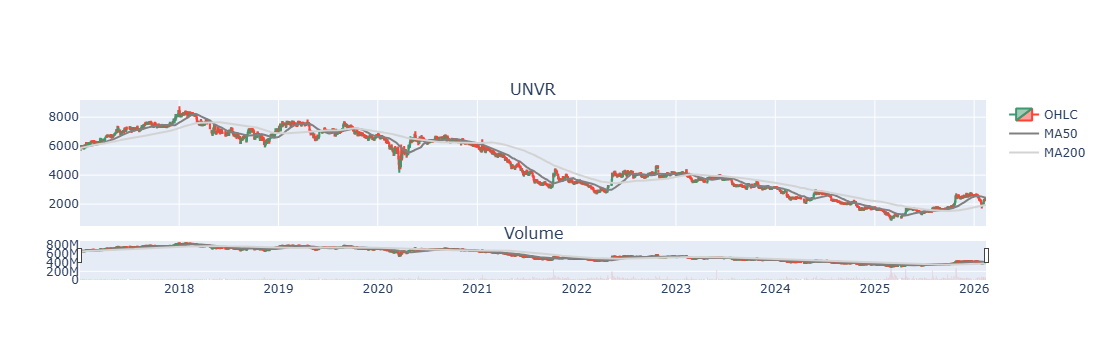

In [8]:
fig.add_trace(
    go.Bar(x=df.index,
          y=df['Volume']['UNVR.JK'],
          marker_color='red',
          showlegend=False),
    row=2,
    col=1
)

#### Update fig layout

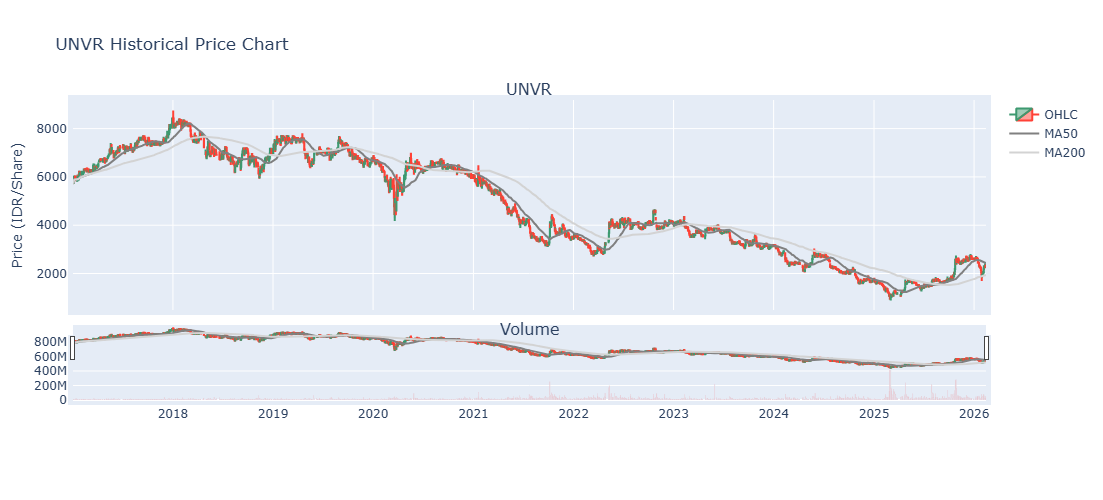

In [9]:
fig.update_layout (
    height= 500,
    width = 1000,
    title = 'UNVR Historical Price Chart',
    xaxis_tickfont_size = 12,
    yaxis = dict(
        title = 'Price (IDR/Share)',
        titlefont_size = 14,
        tickfont_size =12
    ),
    autosize = False,
    margin = dict(l=50 ,r=50 ,b=100 ,t=100, pad=5),
    paper_bgcolor = 'white'
)

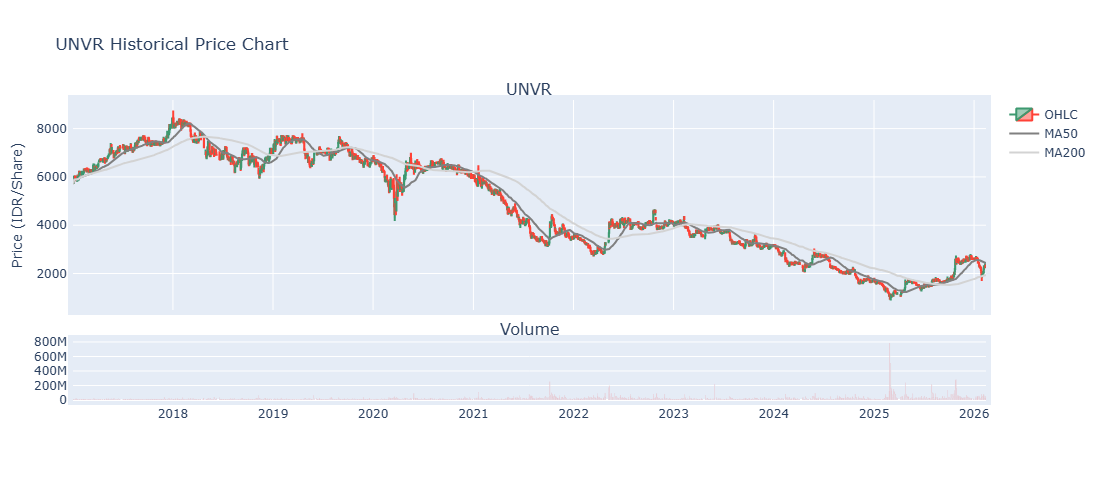

In [10]:
fig.update(
    layout_xaxis_rangeslider_visible=False
)
fig.show()